# **Investigate Hotel Business using Data Visualization**

## **Load Dataset**
---

In [1]:
# import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read dataset
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
#overview
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
110312,City Hotel,0,31,2019,June,16,21,2,3,1,...,1,No Deposit,21.0,NaN,0,Family,75.0,0,0,Check-Out
32051,Resort Hotel,0,5,2019,March,2,14,0,1,2,...,0,No Deposit,250.0,NaN,0,Personal,44.0,0,0,Check-Out
35327,Resort Hotel,0,76,2019,June,16,16,2,1,2,...,0,No Deposit,314.0,NaN,0,Personal,43.2,0,0,Check-Out
3383,Resort Hotel,1,149,2017,February,49,5,2,1,2,...,0,Non Refund,38.0,NaN,0,Personal,68.0,0,0,Canceled
97909,City Hotel,0,24,2018,November,39,19,1,2,2,...,0,No Deposit,28.0,NaN,0,Personal,107.0,0,0,Check-Out


## **Data Exploration**
---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# cek data duplicat
df.duplicated().sum()

33261

- Dataset memeiliki **119390** records dan **29** fitur
- Terdapat **missing/null value** pada fitur **`company`**, **`city`**, **`children`**, **`agent`**
- Tipe data : **object, float64, int64**
- Terdapat **33261 data duplikat**

In [6]:
# cek valaue dari setiap fitur
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('')

hotel have 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']

is_canceled have 2 unique values: int64
is_canceled values: [0 1]

lead_time have 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 

- Terdapat value **'Undefined'** pada fitur `meal`, `market_segment`, `distribution_channel`. Akan dilakukan analisis lebih lanjut apakah valaue tersebut perlu di handling atau tidak
- Fitur **`company`** dan **`agent`** memiliki value float, kemungkinan merujuk pada id atau **value yang telah di encoding**
- Fitur yang menunjukkan jumlah tamu yaitu `adults`, `children`, dan `babies` akan dilakukan analisis lebih lanjut untuk mengatahui apakah terdapat data yang anomali

In [7]:
# statistical summary fitur numerik
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2018.16,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


- Fitur `adr`, **Averange Daily Rate** (room revenue/number of room sold) terdapat **value negatif**. Hal itu merupakan **anomali** dan perlu didrop.

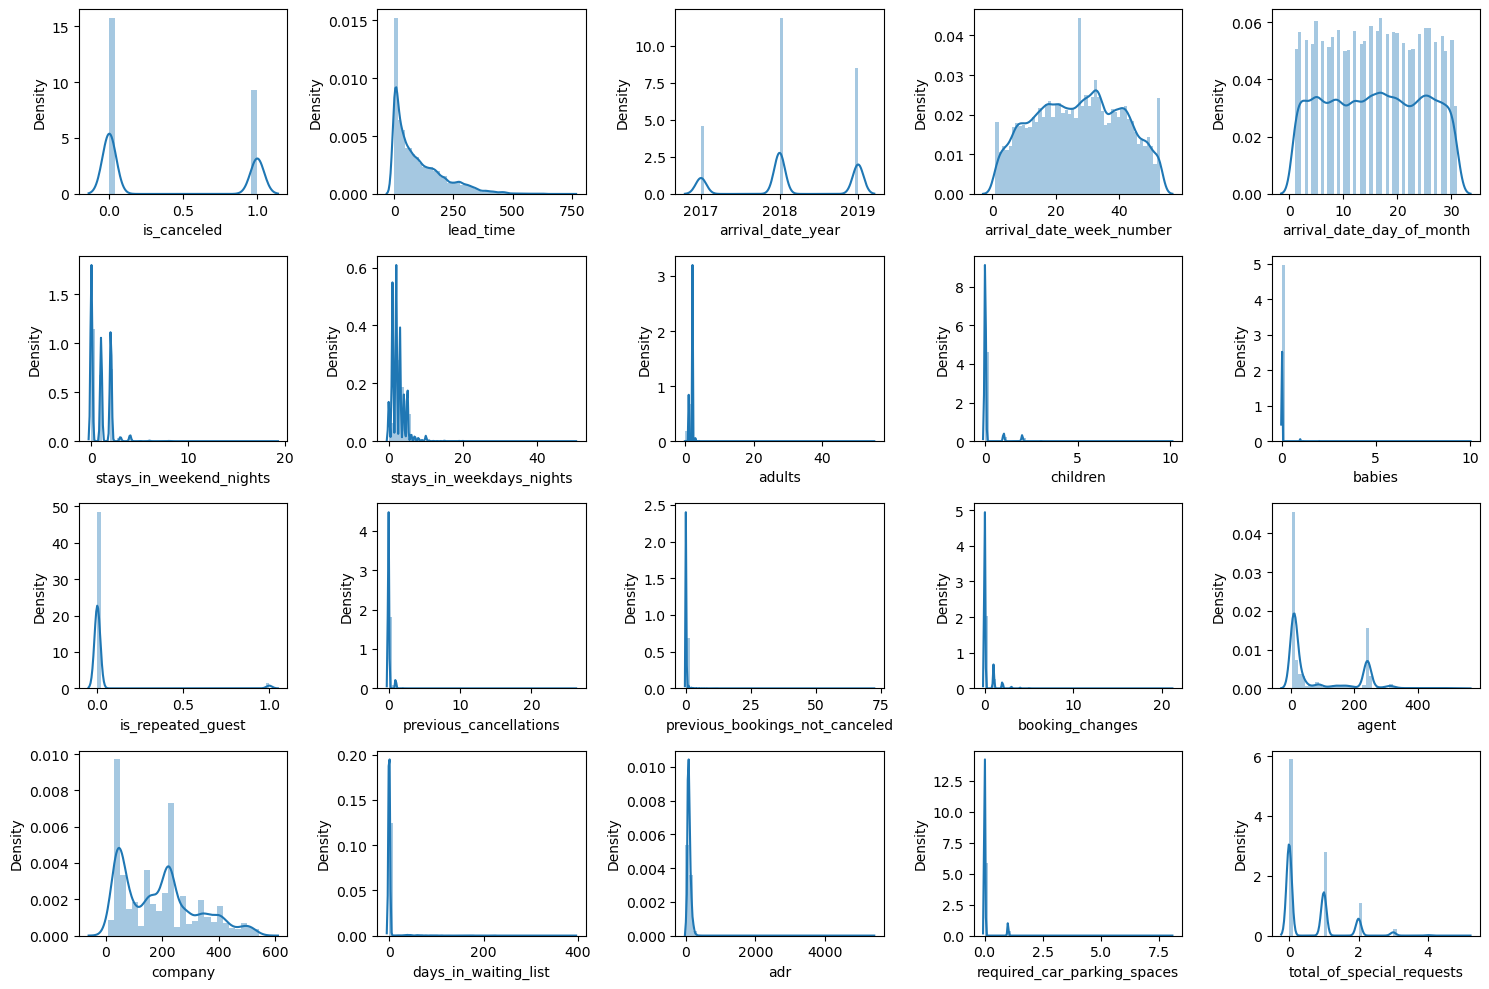

In [8]:
# cek distribusi fitur numerikal
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

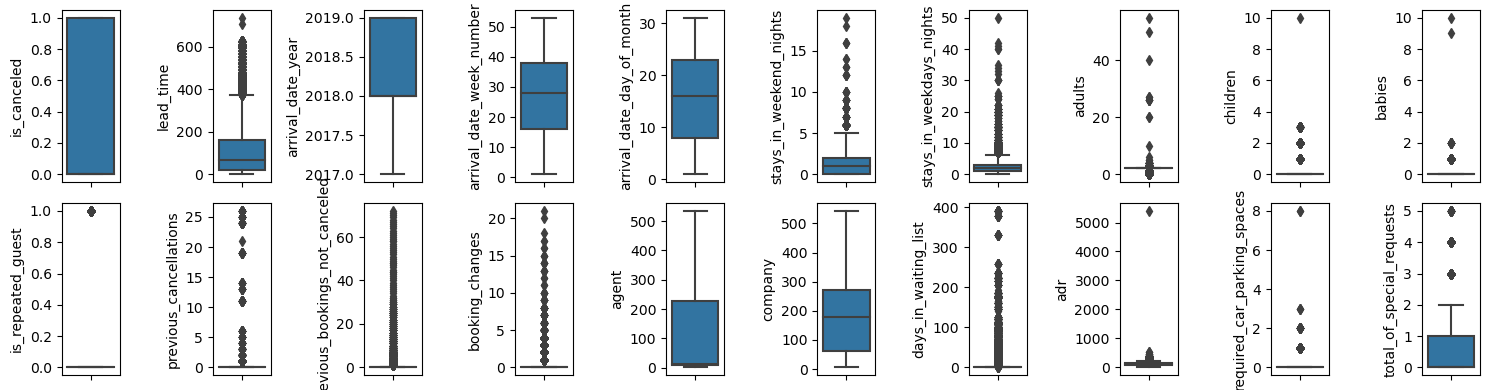

In [9]:
# cek outlier fitur numerikal
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

- Apakah value maksimal dari fitur childern, babies, dan adr merupakan anomali?
- Apakah dalam 1 kali reservasi tamu dewasa membawa 8-10 bayi atau anak-anak?
- Pada fitur adr terdapat perbedaan value yang sangat jauh.

In [10]:
# cek kolom adr
df[df['adr'] > 5000].T

,48515
hotel,City Hotel
is_canceled,1
lead_time,35
arrival_date_year,2018
arrival_date_month,May
arrival_date_week_number,13
arrival_date_day_of_month,25
stays_in_weekend_nights,0
stays_in_weekdays_nights,1
adults,2


In [11]:
# cek children > 10
df[df['children'] >= 9].T

,328
hotel,Resort Hotel
is_canceled,1
lead_time,55
arrival_date_year,2017
arrival_date_month,September
arrival_date_week_number,29
arrival_date_day_of_month,12
stays_in_weekend_nights,4
stays_in_weekdays_nights,10
adults,2


In [12]:
# cek children >= 9
df[df['babies'] >= 9].T

,46619,78656
hotel,City Hotel,City Hotel
is_canceled,0,0
lead_time,37,11
arrival_date_year,2018,2017
arrival_date_month,March,December
arrival_date_week_number,3,42
arrival_date_day_of_month,12,11
stays_in_weekend_nights,0,2
stays_in_weekdays_nights,2,1
adults,2,1


In [13]:
# cek tamu
# tidak ada tamu
guest_0 = df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0) & (df['reservation_status'] != 'Canceled')]
guest_0.shape[0]

156

In [26]:
# hanya ada tamu babies
guest_babies = df[(df['adults'] == 0) & ((df['children'] == 0) & (df['babies'] != 0)) & (df['reservation_status'] != 'Canceled')]
guest_babies.shape[0]

0

In [27]:
# cek night
night_0 = df[(df['stays_in_weekend_nights'] == 0) & (df['stays_in_weekdays_nights'] == 0) & (df['reservation_status'] != 'Canceled')]
night_0.shape[0]

693

Ditemukan beberapa data anomali dan perlu di drop:
- Data **`adr` > 5000**
- Data `children` >=10 dan `babies` >= 8
- 156 data yang **tidak memiliki tamu** sama seali
- 693 data yang memiliki value **night stay = 0**

In [28]:
# statistical summary fitur ketegorikal
df.describe(exclude=np.number).round(2).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


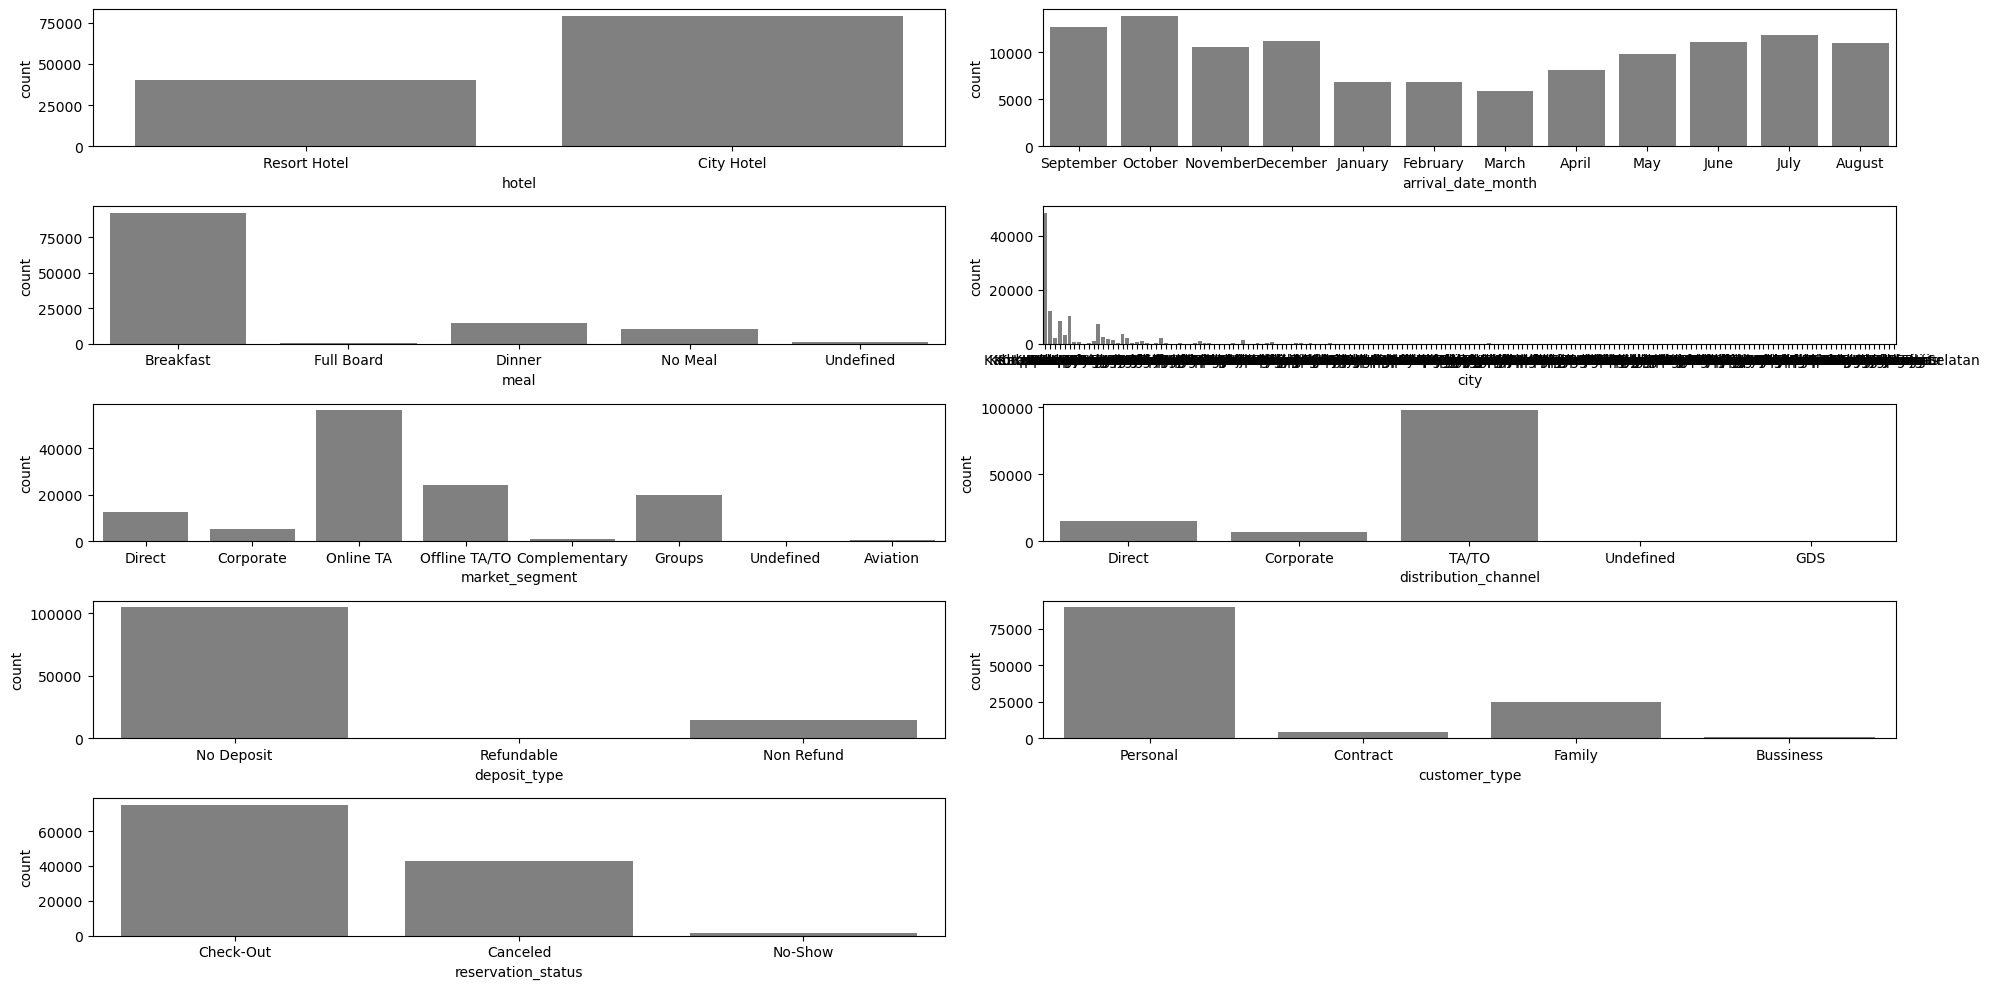

In [29]:
# cek distribusi fitur kategorikal
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]], color='grey')
    plt.tight_layout()

## **Data Cleansing**
---

### **Handling Duplicated Data**

In [30]:
# copy dataset untuk back up
df_clean = df.copy()

In [31]:
# drop data duplikat
df_clean.drop_duplicates(inplace=True)

In [32]:
# cek data setelah drop duplikat
df_clean.duplicated().sum()

0

### **Handling Null Values**

Fitur yang terdapat null values **company, city, children, agent** <br>
Treatment :
- company - null value diisi dengan 0, mengindikasikan tamu tidak bersal dari company
- agent - null value diisi dengan 0, mengindikasikan tamu melakukan reservasi mandiri atau tidak melalui agen
- children - null value diisi dengan 0, mengindikasikan tamu tidak membawa anak-anak
- city - null values diisi dengan 'Undefined', karena kota tidak diketahui secara pasti.

In [33]:
# company, agent, children
fitur = ['company', 'children', 'agent']

for col in fitur:
    df_clean[col].fillna(0, inplace=True)

In [34]:
# city
df_clean['city'].fillna('Undefined', inplace=True)

In [35]:
df_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### **Handling Value Issues**

Fitur **`meal`** dapat dikategorikan menjadi 2 yaitu 'With Meal' dan 'No Meal'
- **'With Meal'** = Breakfast, Full Board, Dinner
- **'No Meal'** = No Meal, Undefined

In [36]:
# replace value meal
df_clean['meal'].replace('Undefined', 'No Meal', inplace = True)
df_clean['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

In [37]:
# cek value meal
df_clean['meal'].unique()

array(['With Meal', 'No Meal'], dtype=object)

Fitur **`Children`** sebaiknya integer

In [38]:
# convert to int
df_clean['children'] = df_clean['children'].astype('int64')

### **Handling Anomaly Data**

In [42]:
# data anomaly adr
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]

In [43]:
# drop
df_clean.drop(index = index_adr.index, inplace=True)
index_adr.shape[0]

0

In [47]:
# anomaly babies, children
index_child_babies = df_clean[(df_clean['children'] == 10) | (df_clean['babies'] >= 9)]

In [48]:
# drop
df_clean.drop(index = index_child_babies.index, inplace=True)
index_child_babies.shape[0]

0

In [51]:
# anomaly tidak ada tamu
index_guest_0 = df_clean[(df_clean['adults'] == 0) & (df_clean['children'] == 0) & (df_clean['babies'] == 0) 
                         & (df_clean['reservation_status'] != 'Canceled')]

In [52]:
# drop
df_clean.drop(index = index_guest_0.index, inplace=True)
index_guest_0.shape[0]

0

In [55]:
# drop anomali jumlah stay = 0
index_stay = df_clean[(df_clean['stays_in_weekend_nights'] == 0) & (df_clean['stays_in_weekdays_nights'] == 0) 
                      & (df_clean['reservation_status'] != 'Canceled')]

In [56]:
# drop
df_clean.drop(index = index_stay.index, inplace=True)
index_stay.shape[0]

0

In [57]:
print('Total Records Before Cleaned :', df.shape[0])
print('Total Records After Cleaned :', df_clean.shape[0])

Total Records Before Cleaned : 119390
Total Records After Cleaned : 85398


### **Save Data Cleaned**

In [58]:
df_clean.to_csv('hotel_bookings_cleaned.csv', index=False)

## **Monthly Hotel Booking Analysis Based on Hotel Type**
---

In [78]:
# read dataset yang telah dibersihkan sebelumnya
df_c = pd.read_csv('hotel_bookings_cleaned.csv')

### **Pencentage of Total Booking for 3 Years**

In [79]:
# summary persentase total booking
# group fitur hotel dan agregasi menggunakan count
hotel_type = df_c.groupby('hotel')[['hotel']].count()

# hitung persentase
hotel_type.columns = ['percentage']
hotel_type['percentage'] = (hotel_type['percentage']/hotel_type['percentage'].sum()*100).round(2)
hotel_type

,percentage
hotel,
City Hotel,61.13
Resort Hotel,38.87


Text(80.435, 0.18, 'Resort Hotel')

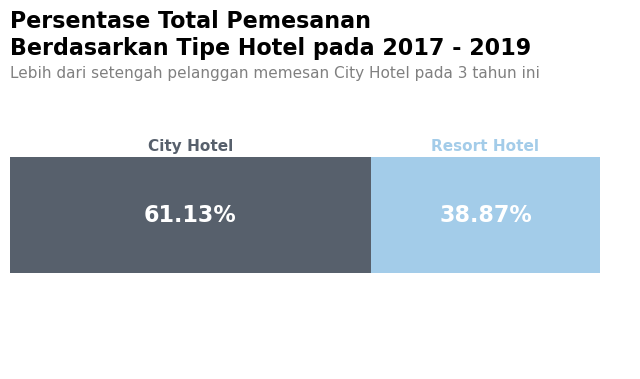

In [80]:
# membuat visualisasi data

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(8,4)

# membuat plot
hotel_vis = hotel_type.T
hotel_vis.plot(kind='barh', stacked=True, color = ['#57606c', '#a3cce9'], ax = ax, width = 0.3)

# mengatur border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# mengatur tikc
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)

# menghapus legenda
plt.legend().remove()

# menambahkan keterangan nilai pada bar
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', fontsize=16, color='white', fontweight = 'bold')

# judul dan deskripsi    
plt.title('Persentase Total Pemesanan \nBerdasarkan Tipe Hotel pada 2017 - 2019', fontsize=16, pad=5, loc='left',fontweight='bold')
plt.text(y = 0.37, x = 0, s = 'Lebih dari setengah pelanggan memesan City Hotel pada 3 tahun ini',
         ha='left', va='center', color = 'grey', size=11)

# keterangan/legenda
plt.text(y = 0.18, x = (hotel_vis['City Hotel'][0]/2), s = 'City Hotel', ha='center', va='center', color = '#57606c', weight = 'bold', size = 11)
plt.text(y = 0.18, x = 61 + (hotel_vis['Resort Hotel'][0]/2), s = 'Resort Hotel', ha='center', va='center', color = '#a3cce9', weight = 'bold', size = 11)

- Diduga bahwa customer yang memesan hotel kota merupakan pelancong yang memiliki aktivitas utama disekitar tempat mereka menginap, mungkin karena perjalan binis dll.
- Sementara 39% lainnya merupakan pelanggan yang berwisata atau pelanggan banyak menghabiskan waktunya di hotel resort, mungkin tidak memiliki aktivitas utama diluar seperti City Hotel.

### **Pencentage of Total Booking per Month**

In [13]:
# membuat summary dari aggregasi total booking per month
monthly_booking = df_c.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
monthly_booking

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,3517
1,City Hotel,August,2,4909
2,City Hotel,December,2,4008
3,City Hotel,February,2,2953
4,City Hotel,January,2,2850
5,City Hotel,July,2,5322
6,City Hotel,June,2,5021
7,City Hotel,March,2,2675
8,City Hotel,May,2,4777
9,City Hotel,November,2,4042


- Dikarenakan n unique bulan Oktober dan November berbeda maka dilakukan normalisasi data dengan menghitung rata2 total booking perbulannya.

#### **Normalization**

In [14]:
# menghitung rata-rata dari count dibagi nunique
monthly_booking['average'] = round(monthly_booking['count']/monthly_booking['nunique'])
monthly_booking

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,3517,1758.0
1,City Hotel,August,2,4909,2454.0
2,City Hotel,December,2,4008,2004.0
3,City Hotel,February,2,2953,1476.0
4,City Hotel,January,2,2850,1425.0
5,City Hotel,July,2,5322,2661.0
6,City Hotel,June,2,5021,2510.0
7,City Hotel,March,2,2675,1338.0
8,City Hotel,May,2,4777,2388.0
9,City Hotel,November,2,4042,2021.0


#### **Sort Month Value**

In [15]:
# mengurutkan bulan
monthly_booking['month'] = monthly_booking['arrival_date_month'].str[:3]
monthly_booking['month'] = pd.Categorical(monthly_booking['month'], 
                                          categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_booking.sort_values('month')

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,2850,1425.0,Jan
16,Resort Hotel,January,2,1996,998.0,Jan
3,City Hotel,February,2,2953,1476.0,Feb
15,Resort Hotel,February,2,2044,1022.0,Feb
7,City Hotel,March,2,2675,1338.0,Mar
19,Resort Hotel,March,2,1904,952.0,Mar
0,City Hotel,April,2,3517,1758.0,Apr
12,Resort Hotel,April,2,2455,1228.0,Apr
20,Resort Hotel,May,2,2585,1292.0,May
8,City Hotel,May,2,4777,2388.0,May


#### **Visualization**

Text(5.5, 2780, 'High Peak\n Season')

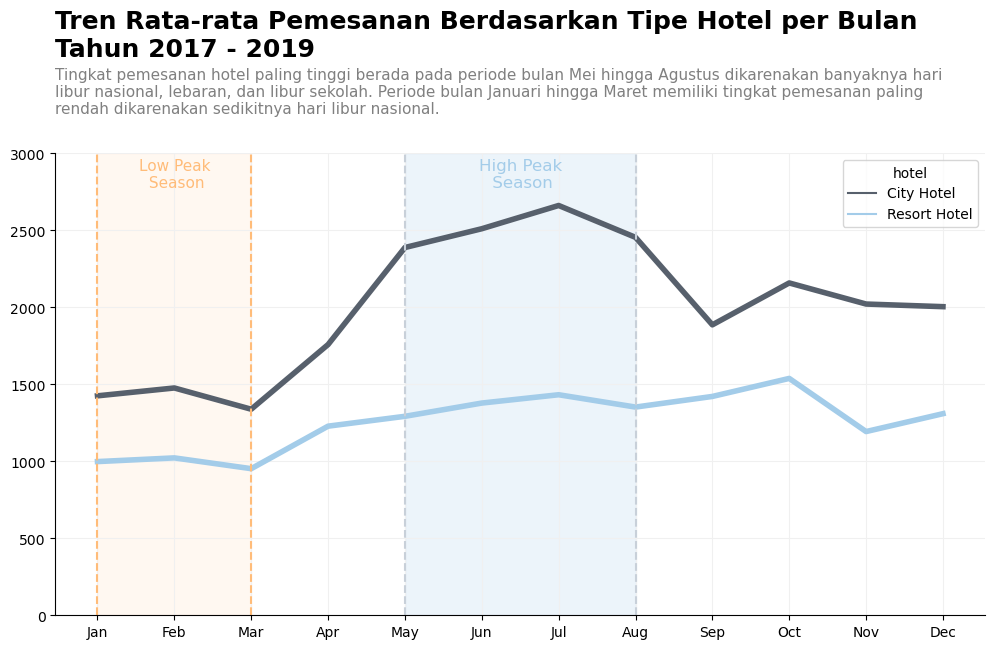

In [16]:
# membuat visualisasi data

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# membuat plot
sns.lineplot(x='month', y='average', hue='hotel', data= monthly_booking, palette=['#57606c', '#a3cce9'], linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0,3000)

# mengatur label
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('')
plt.xlabel('')

# menambahkan judul dan deskripsi
plt.title('Tren Rata-rata Pemesanan Berdasarkan Tipe Hotel per Bulan \nTahun 2017 - 2019', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 3400, x = -0.55, s = 'Tingkat pemesanan hotel paling tinggi berada pada periode bulan Mei hingga Agustus dikarenakan banyaknya hari \nlibur nasional, lebaran, dan libur sekolah. Periode bulan Januari hingga Maret memiliki tingkat pemesanan paling \nrendah dikarenakan sedikitnya hari libur nasional.',
         ha='left', va='center', color = 'grey', size=11)

#set holiday season
plt.axvline(x=0, color='#ffbc79', ls='--')
plt.axvline(x=2, color='#ffbc79', ls='--')
plt.stackplot([0, 1, 2], [3000], color='#ffbc79', alpha=0.1)
plt.text(x=1, y=2780, s='Low Peak\n Season', fontsize=11, color='#ffbc79', ha='center')

#set holiday season
plt.axvline(x=4, color='#c8d0d9', ls='--')
plt.axvline(x=7, color='#c8d0d9', ls='--')
plt.stackplot([4, 5, 6, 7], [3000], color='#a3cce9', alpha=0.2)
plt.text(x=5.5, y=2780, s='High Peak\n Season', fontsize=12, color='#a3cce9', ha='center')


- Season tertinggi pemesanan hotel pada perode bulan Mei - Agustus untuk City Hotel dan Resort Hotel. Hal ini karena pada periode tahun tersebut bertepatan dengan banyaknya hari libur nasional termasuk cuti bersama, event keagamaan (ramadhan dan lebaran), serta liburan sekolah di Indonesia. Sehingga banyak kesempatan untuk masyarakat menfaatkan waktunya untuk berlibur, berkunjung ke luar kota, dan memesan hotel.

- Season terendah pemesanan hotel berada pada bulan Januari - Maret untuk City Hotel dan Resort Hotel. Karena selain sedikit sekali hari libur nasional, pada bulan tersebut juga merupakan liburan sekolah yang kedua dengan waktu yang singkat dan bukan perjalanan bisnis yang sibuk karena masih awal tahu.


## **Impact Analysis of Stay Duration on Hotel Bookings Cancelation Rates**
---

### **Duration of Stay**

In [5]:
df_c.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [7]:
df_c['stays_in_weekdays_nights'].value_counts()

1     21767
2     20314
3     16023
5      9591
4      7788
0      5467
6      1372
10      962
7       960
8       610
9       216
15       67
11       50
12       40
20       39
13       27
14       23
19       20
21       14
16       12
22        6
25        6
18        6
30        4
17        4
24        2
40        2
33        1
42        1
50        1
32        1
26        1
34        1
Name: stays_in_weekdays_nights, dtype: int64

In [8]:
df_c['stays_in_weekend_nights'].value_counts()

0     33831
2     26140
1     22289
4      1721
3      1139
6       112
5        67
8        57
7        15
9         8
10        7
12        5
13        2
16        2
18        1
19        1
14        1
Name: stays_in_weekend_nights, dtype: int64

In [9]:
# membuat kolom baru
df_c['total_stay_duration'] = df_c['stays_in_weekdays_nights'] + df_c['stays_in_weekend_nights']
df_c.sample(5).T

,20508,75296,29131,42379,59772
hotel,Resort Hotel,City Hotel,Resort Hotel,City Hotel,City Hotel
is_canceled,0,0,0,1,0
lead_time,15,0,144,123,44
arrival_date_year,2018,2019,2019,2018,2018
arrival_date_month,September,May,June,November,June
arrival_date_week_number,28,10,17,39,18
arrival_date_day_of_month,8,5,29,20,29
stays_in_weekend_nights,1,2,0,1,0
stays_in_weekdays_nights,2,1,1,5,1
adults,2,2,2,3,2


<AxesSubplot: xlabel='total_stay_duration', ylabel='Count'>

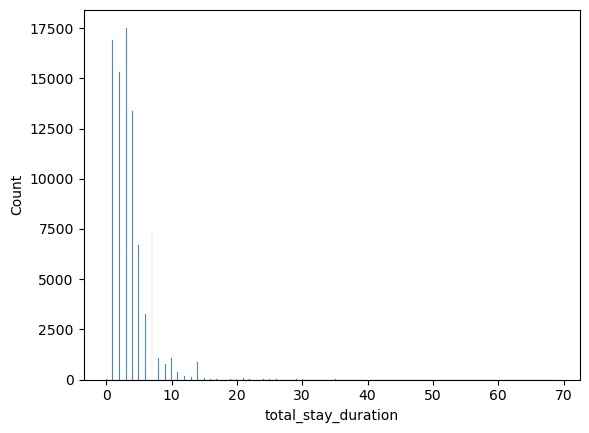

In [13]:
# distribusi total durasi menginap
sns.histplot(df_c['total_stay_duration'])

In [15]:
df_c['total_stay_duration'].nunique()

42

Total durasi menginap customer diantara 1 hingga 42 hari. Untuk memudahkan pengeintepretasian maka akan dibuat kolom dengan kategori durasi perminggu.
- **< 1 Minggu** : 1 - 7 hari
- **1 - 2 Minggu** : 8 - 14 hari
- **2 - 3 Minggu** : 15 - 21 hari
- **2 - 4 Minggu** : 22 - 28 hari
- **> 4 Minggu** : > 28 hari

In [24]:
df_c['total_stay_week'] = np.where((df_c['total_stay_duration']) < 8, "< 1 Minggu",
                                   np.where((df_c['total_stay_duration']) < 15, "1-2 Minggu",
                                   np.where((df_c['total_stay_duration']) < 22, "2-3 Minggu", 
                                   np.where((df_c['total_stay_duration']) < 29, '3-4 Minggu', '> 4 Minggu'))))

In [31]:
df_c['total_stay_week'].value_counts()

< 1 Minggu    80581
1-2 Minggu     4457
2-3 Minggu      235
3-4 Minggu       81
> 4 Minggu       44
Name: total_stay_week, dtype: int64

### **Cancelation Rate**

In [29]:
# group fitur hotel dan agregasi menggunakan count
cancel = df_c.groupby('is_canceled')[['is_canceled']].count()

# hitung persentase
cancel.columns = ['percentage']
cancel['percentage'] = (cancel['percentage']/cancel['percentage'].sum()*100).round(2)
cancel

,percentage
is_canceled,
0,72.22
1,27.78


Text(84.89, 0.18, 'Canceled')

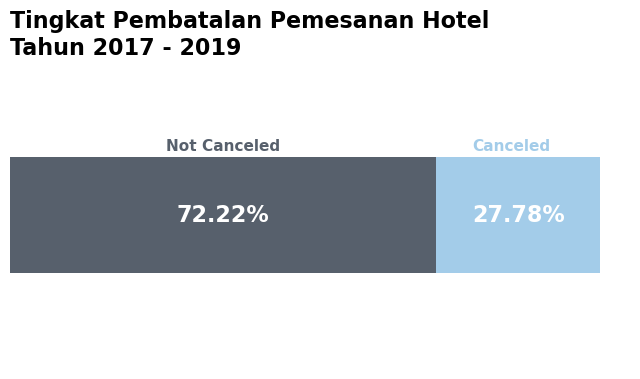

In [93]:
# membuat visualisasi data

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(8,4)

# membuat plot
cancel = cancel.T
cancel.plot(kind='barh', stacked=True, color = ['#57606c', '#a3cce9'], ax = ax, width = 0.3)

# mengatur border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# mengatur tikc
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)

# menghapus legenda
plt.legend().remove()

# menambahkan keterangan nilai pada bar
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', fontsize=16, color='white', fontweight = 'bold')

# judul dan deskripsi    
plt.title('Tingkat Pembatalan Pemesanan Hotel \nTahun 2017 - 2019', fontsize=16, pad=5, loc='left',fontweight='bold')

# keterangan/legenda
plt.text(y = 0.18, x = (cancel[0][0]/2), s = 'Not Canceled', ha='center', va='center', color = '#57606c', weight = 'bold', size = 11)
plt.text(y = 0.18, x = 71 + (cancel[1][0]/2), s = 'Canceled', ha='center', va='center', color = '#a3cce9', weight = 'bold', size = 11)

In [35]:
# cancel rate based on totel type,duration
cancel_rate = df_c.groupby(['hotel', 'total_stay_week']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
cancel_rate['cancel_rate'] = 100*(cancel_rate['is_canceled'] / cancel_rate['arrival_date_day_of_month']).round(2)
cancel_rate

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
0,City Hotel,1-2 Minggu,523,1009,52.0
1,City Hotel,2-3 Minggu,74,101,73.0
2,City Hotel,3-4 Minggu,21,25,84.0
3,City Hotel,< 1 Minggu,15209,51052,30.0
4,City Hotel,> 4 Minggu,18,20,90.0
5,Resort Hotel,1-2 Minggu,938,3448,27.0
6,Resort Hotel,2-3 Minggu,47,134,35.0
7,Resort Hotel,3-4 Minggu,20,56,36.0
8,Resort Hotel,< 1 Minggu,6864,29529,23.0
9,Resort Hotel,> 4 Minggu,6,24,25.0


#### **Sorted `total_stay_week` Value**

In [42]:
week = ['< 1 Minggu', '1-2 Minggu', '2-3 Minggu', '3-4 Minggu', '> 4 Minggu']
cancel_rate['total_stay_week'] = pd.Categorical(cancel_rate['total_stay_week'], categories = week)
cancel_rate = cancel_rate.sort_values('total_stay_week')
cancel_rate

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
3,City Hotel,< 1 Minggu,15209,51052,30.0
8,Resort Hotel,< 1 Minggu,6864,29529,23.0
0,City Hotel,1-2 Minggu,523,1009,52.0
5,Resort Hotel,1-2 Minggu,938,3448,27.0
1,City Hotel,2-3 Minggu,74,101,73.0
6,Resort Hotel,2-3 Minggu,47,134,35.0
2,City Hotel,3-4 Minggu,21,25,84.0
7,Resort Hotel,3-4 Minggu,20,56,36.0
4,City Hotel,> 4 Minggu,18,20,90.0
9,Resort Hotel,> 4 Minggu,6,24,25.0


#### **Visualization**

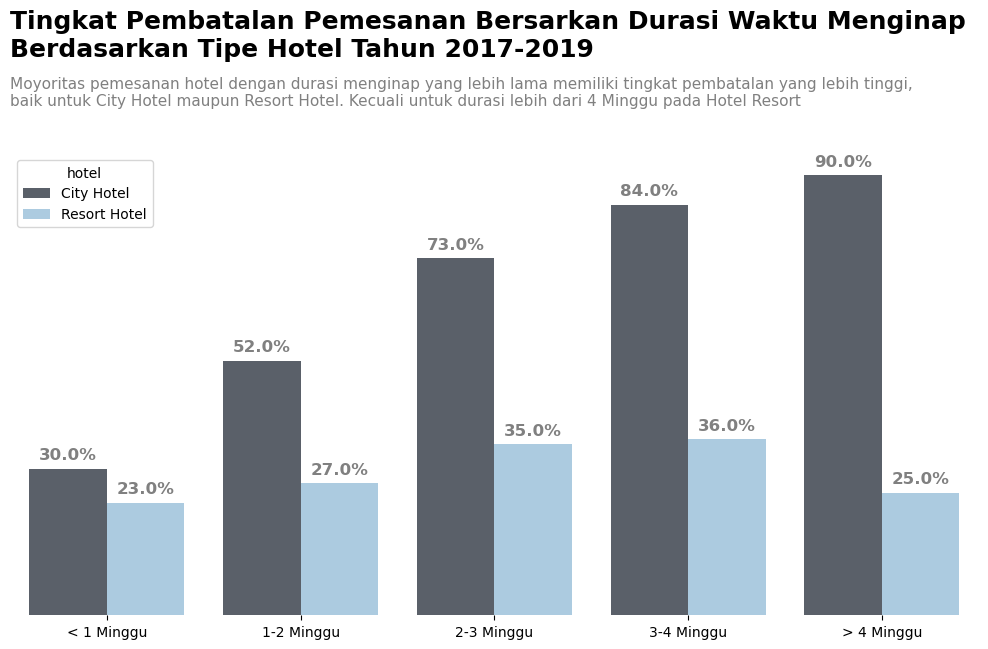

In [77]:
# membuat visualisasi data

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12.5,6)

# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# plot
ax = sns.barplot(x = cancel_rate['total_stay_week'], y = cancel_rate['cancel_rate'], hue=cancel_rate['hotel'], hue_order = ['City Hotel', 'Resort Hotel'], palette=['#57606c', '#a3cce9'])

# mengatur label
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
plt.ylabel('')
plt.xlabel('')

# menambahkan judul dan deskripsi
plt.title('Tingkat Pembatalan Pemesanan Bersarkan Durasi Waktu Menginap \nBerdasarkan Tipe Hotel Tahun 2017-2019', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 107, x = -0.5, s = 'Moyoritas pemesanan hotel dengan durasi menginap yang lebih lama memiliki tingkat pembatalan yang lebih tinggi, \nbaik untuk City Hotel maupun Resort Hotel. Kecuali untuk durasi lebih dari 4 Minggu pada Hotel Resort',
         ha='left', va='center', color = 'grey', size=11)

for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = txt.astype('str')
    ax.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, color='grey', fontweight='bold' )

- Sebagian besar tingkat pembatalan didominasi oleh City Hotel.
- Tingkat pembatalan akan semakin tinggi seiring dengan lama durasi menginap yang dipesan pada kedua tipe hotel. Namun untuk pemesanan dengan durasi lebih dari 4 minggu, Resort Hotel memiliki tingkat pembatalan yang cukup rendah.